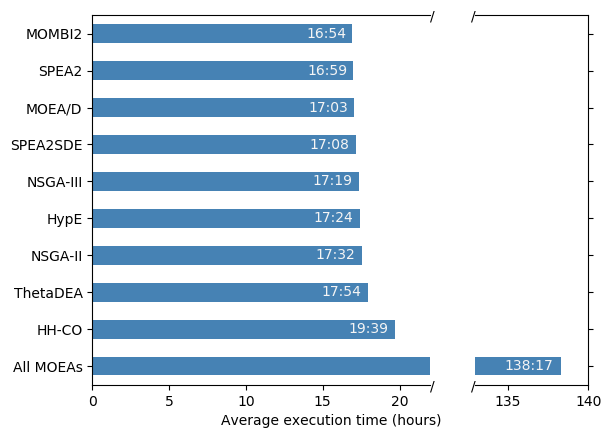

MOMBI2       16.908951
SPEA2        16.988623
MOEAD        17.054781
SPEA2SDE     17.135988
NSGAIII      17.331762
HypE         17.407990
NSGAII       17.543936
ThetaDEA     17.911621
CHHCO        19.666123
Sum         138.283652
dtype: float64

<Figure size 640x480 with 0 Axes>

In [149]:
import pandas as pd
import math
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('default')



algorithms=["HypE", "MOEAD", "MOMBI2", "NSGAII", "NSGAIII", "SPEA2", "SPEA2SDE", "ThetaDEA", "CHHCO"]
# algorithms=["ThetaDEA", "NSGAII"]

dflist = []
for alg in algorithms:
    base='../experiment/pc5/ECSymposium2019CompetitionMethodology/5/data/%s/WindTurbineDesign/TIME'%(alg)
    alglist = []
    for i in range(21):
        df = pd.read_csv("%s%s.tsv"%(base, i), header=None)
        df.columns = [alg]
        df[alg] = df[alg] / 3.6e+6 # milliseconds to hours
        alglist.append(df)
    dfalg = pd.concat(alglist)
    dfalg.reset_index(drop=True, inplace=True)
    dflist.append(dfalg)
df = pd.concat(dflist, axis=1)
moeasdf = df.filter(["HypE", "MOEAD", "MOMBI2", "NSGAII", "NSGAIII", "SPEA2", "SPEA2SDE", "ThetaDEA"], axis=1)
df['Sum'] = moeasdf.sum(axis=1)
# set order
df = df[["Sum","CHHCO","ThetaDEA","NSGAII","HypE","NSGAIII","SPEA2SDE","MOEAD","SPEA2","MOMBI2"]]
# display(df)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# ax = df.max().plot.bar(rot=90, color="lightsteelblue", ax=ax)
# ax2 = df.max().plot.bar(rot=90, color="lightsteelblue", ax=ax2)
ax = df.mean().plot.barh(color="steelblue", ax=ax, label="Average")
ax2 = df.mean().plot.barh(color="steelblue", ax=ax2,label="Average")
ax.set_xlim(0,22)
ax2.set_xlim(133,140)
ax.text(22, -0.65, "/", rotation=0)
ax.text(22, 9.35, "/", rotation=0)
ax2.text(132.7, -0.65, "/", rotation=0)
ax2.text(132.7, 9.35, "/", rotation=0)
# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.yaxis.tick_right()

ax2.text(138.283652-3.5, 0-0.1, "%d:%02d"%(math.floor(138.283652),math.floor((138.283652-math.floor(138.283652))*60)), color='whitesmoke', rotation=0)
values = [19.666123,17.911621,17.543936,17.407990,17.331762,17.135988,17.054781,16.988623,16.908951]
i = 0
while i < len(values):
    ax.text(values[i]-3, i+1-.1, "%d:%02d"%(math.floor(values[i]),math.floor((values[i]-math.floor(values[i]))*60)), color='whitesmoke', rotation=0)
    i += 1

ax.set_xlabel("                                Average execution time (hours)")
ex = ax.set_yticklabels(["All MOEAs", "HH-CO", "ThetaDEA", "NSGA-II", "HypE", "NSGA-III", "SPEA2SDE", "MOEA/D", "SPEA2", "MOMBI2"])
# ax2.legend()#bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2)
plt.show()

fig = ax.get_figure()
plt.subplots_adjust(left=0)
fig.savefig("executiontime.pdf", bbox_inches='tight')

df = df.mean()
df.sort_values(inplace=True, ascending=True)
df